In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
from imblearn.over_sampling import RandomOverSampler

In [8]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [9]:
ros = RandomOverSampler()
df = pd.DataFrame(ros.fit_resample(df, df['Exited'])[0])

In [10]:
df['Exited'].value_counts()

,count
Exited,
1,7963
0,7963


In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [13]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


In [14]:
x = df.iloc[: , :-1]
y = df['Exited']

In [15]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns = x.columns)

In [16]:
x.head(3)
x.shape

(15926, 10)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import l1

In [19]:
ann = Sequential()

In [20]:
ann.add(Dense(10, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(8, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(6, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(5, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(3, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(2, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(1, activation='sigmoid'))

In [21]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
ann.fit(x_train, y_train, epochs = 20, batch_size = 256, validation_data=(x_test, y_test), callbacks= EarlyStopping(patience=3))

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.4913 - loss: 0.9279 - val_accuracy: 0.5082 - val_loss: 0.6942
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5343 - loss: 0.7687 - val_accuracy: 0.5129 - val_loss: 0.6921
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5735 - loss: 0.6977 - val_accuracy: 0.5232 - val_loss: 0.6820
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6106 - loss: 0.6596 - val_accuracy: 0.6030 - val_loss: 0.6675
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6188 - loss: 0.6459 - val_accuracy: 0.6234 - val_loss: 0.6506
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6434 - loss: 0.6227 - val_accuracy: 0.6422 - val_loss: 0.6355
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6459 - loss: 0.6128 - val_accuracy: 0.6601 - val_loss: 0.6247
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6616 - loss: 0.5998 - val_accuracy: 0.6707 - val_lo

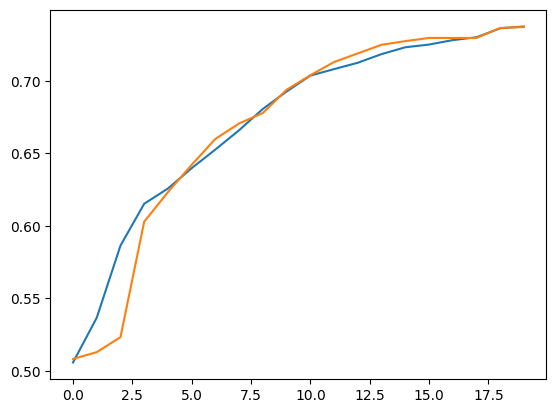

In [24]:
plt.plot(ann.history.history['accuracy'])
plt.plot(ann.history.history['val_accuracy'])
plt.show()

In [25]:
result = list(ann.predict(x_test))

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [26]:
for i in range(len(result)):
    if result[i] > 0.5: result[i] = 1
    else: result[i] = 0

In [27]:
# print(result, end=" ")

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [29]:
y_pred = ann.predict(x_test)
y_pred = y_pred > 0.5
round(accuracy_score(y_test, y_pred)*100, 2)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


73.73

In [30]:
x_pred = ann.predict(x_train)
x_pred = x_pred > 0.5
round(accuracy_score(y_train, x_pred)*100, 2)

399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


74.25

Text(0.5, 1.0, 'Confusion Matrix')

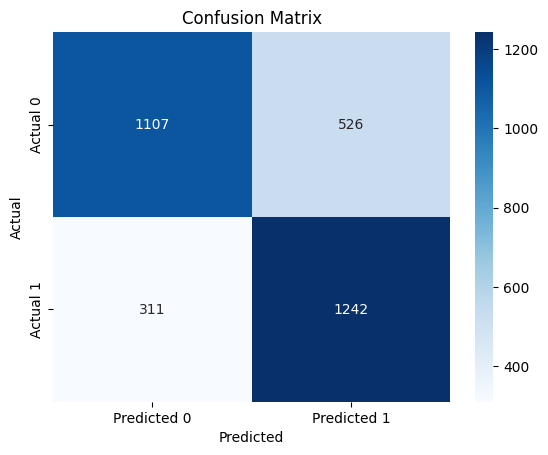

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

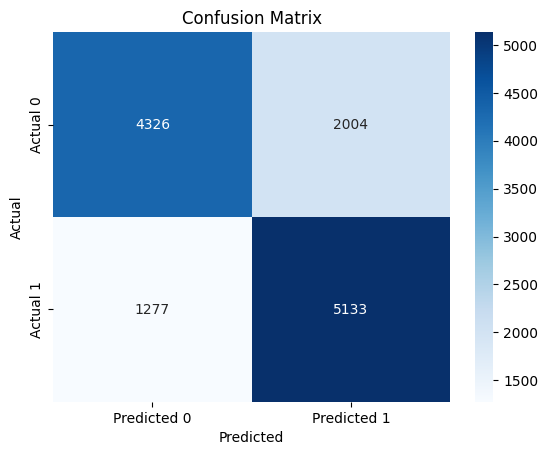

In [35]:
cm = confusion_matrix(y_train, x_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [39]:
round(lr.score(x_test, y_test),2)

0.69